# Optional Lab - Multi-class Classification


## 1.1 Objetivos
En este laboratorio, explorará un ejemplo de clasificación multiclase utilizando redes neuronales.
<figure>
 <img src="./images/C2_W2_mclass_header.png"   style="width500px;height:200px;">
</figure>


## 1.2 Herramientas
Utilizarás algunas rutinas de trazado. Estas se encuentran en `lab_utils_multiclass_TF.py` en este directorio.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

# 2.0 Clasificación multiclase
Las redes neuronales se utilizan a menudo para clasificar datos. Algunos ejemplos son las redes neuronales
- toman fotos y clasifican los sujetos de las fotos como {perro, gato, caballo, otro}
- tomar una frase y clasificar las "partes de la oración" de sus elementos: {sustantivo, verbo, adjetivo, etc.}  

Una red de este tipo tendrá múltiples unidades en su capa final. Cada salida está asociada a una categoría. Cuando se aplica un ejemplo de entrada a la red, la salida con el valor más alto es la categoría predicha. Si la salida se aplica a una función softmax, la salida del softmax proporcionará las probabilidades de que la entrada esté en cada categoría. 

En este laboratorio verás un ejemplo de construcción de una red multiclase en Tensorflow. A continuación, veremos cómo la red neuronal realiza sus predicciones.

Empecemos creando un conjunto de datos de cuatro clases.

## 2.1 Preparar y visualizar nuestros datos
Utilizaremos la función `make_blobs` de Scikit-Learn para crear un conjunto de datos de entrenamiento con 4 categorías, como se muestra en el siguiente gráfico

In [2]:
# hacer un conjunto de datos de 4 clases para la clasificación
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

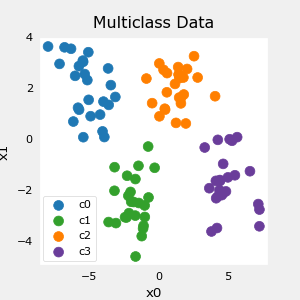

In [3]:
plt_mc(X_train,y_train,classes, centers, std=std)

Cada punto representa un ejemplo de entrenamiento. Los ejes (x0,x1) son las entradas y el color representa la clase a la que se asocia el ejemplo. Una vez entrenado, el modelo se presentará con un nuevo ejemplo, (x0,x1), y predecirá la clase.  

Aunque se ha generado, este conjunto de datos es representativo de muchos problemas de clasificación del mundo real. Hay varias características de entrada (x0,...,xn) y varias categorías de salida. El modelo se entrena para utilizar las características de entrada para predecir la categoría de salida correcta.

In [10]:
# show classes in data set
print(f"Clases unicas {np.unique(y_train)}")
# show how classes are represented
print(f"Representacion de las classes {y_train[:10]}")
# show shapes of our dataset
print(f"forma de  X_train: {X_train.shape}, forma de y_train: {y_train.shape}")

Clases unicas [0 1 2 3]
Representacion de las classes [3 3 3 0 3 3 3 3 2 0]
forma de  X_train: (100, 2), forma de y_train: (100,)


## 2.2 Model
<img align="Right" src="./images/C2_W2_mclass_lab_network.PNG"  style=" width:350px; padding: 10px 20px ; ">
En este laboratorio se utilizará una red de 2 capas como la que se muestra.
A diferencia de las redes de clasificación binaria, esta red tiene cuatro salidas, una para cada clase. Dado un ejemplo de entrada, la salida con el valor más alto es la clase predicha de la entrada.   

A continuación se muestra un ejemplo de cómo construir esta red en Tensorflow. Observe que la capa de salida utiliza una activación `lineal` en lugar de una `softmax`. Si bien es posible incluir el softmax en la capa de salida, es más estable numéricamente si las salidas lineales se pasan a la función de pérdida durante el entrenamiento. Si el modelo se utiliza para predecir probabilidades, el softmax puede aplicarse en ese momento.

In [5]:
tf.random.set_seed(1234)  # aplicado para lograr resultados consistentes
model = Sequential(
    [
        Dense(2, activation = 'relu',   name = "L1"),
        Dense(4, activation = 'linear', name = "L2")
    ]
)

Las declaraciones siguientes compilan y entrenan la red. Establecer `from_logits=True` como argumento de la función de pérdida especifica que la activación de salida fue lineal en lugar de un softmax.

In [6]:
model.compile(
    loss      = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(0.01),
    )

model.fit(X_train , y_train, epochs = 200)

Epoch 1/200
4/4 [==============================] - 2s 9ms/step - loss: 1.8158
Epoch 2/200
4/4 [==============================] - 0s 7ms/step - loss: 1.6976
Epoch 3/200
4/4 [==============================] - 0s 7ms/step - loss: 1.5989
Epoch 4/200
4/4 [==============================] - 0s 10ms/step - loss: 1.5179
Epoch 5/200
4/4 [==============================] - 0s 7ms/step - loss: 1.4369
Epoch 6/200
4/4 [==============================] - 0s 6ms/step - loss: 1.3756
Epoch 7/200
4/4 [==============================] - 0s 8ms/step - loss: 1.3154
Epoch 8/200
4/4 [==============================] - 0s 7ms/step - loss: 1.2621
Epoch 9/200
4/4 [==============================] - 0s 6ms/step - loss: 1.2188
Epoch 10/200
4/4 [==============================] - 0s 9ms/step - loss: 1.1791
Epoch 11/200
4/4 [==============================] - 0s 7ms/step - loss: 1.1446
Epoch 12/200
4/4 [==============================] - 0s 7ms/step - loss: 1.1129
Epoch 13/200
4/4 [==============================] - 0s 6ms/s

Con el modelo entrenado, podemos ver cómo el modelo ha clasificado los datos de entrenamiento.

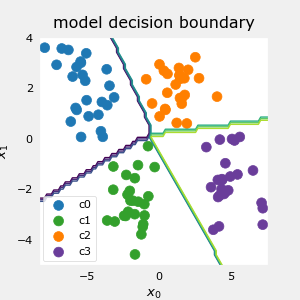

In [7]:
plt_cat_mc(X_train, y_train, model, classes)

Arriba, los límites de decisión muestran cómo el modelo ha dividido el espacio de entrada.  Este modelo tan sencillo no ha tenido problemas para clasificar los datos de entrenamiento. ¿Cómo lo ha conseguido? Veamos la red con más detalle. 

A continuación, sacaremos los pesos entrenados del modelo y los utilizaremos para trazar la función de cada una de las unidades de la red. Más abajo, hay una explicación más detallada de los resultados. No es necesario que conozcas estos detalles para utilizar con éxito las redes neuronales, pero puede ser útil para intuir mejor cómo se combinan las capas para resolver un problema de clasificación.

In [8]:
# obtener los parámetros entrenados de la primera capa
l1 = model.get_layer("L1")
W1,b1 = l1.get_weights()

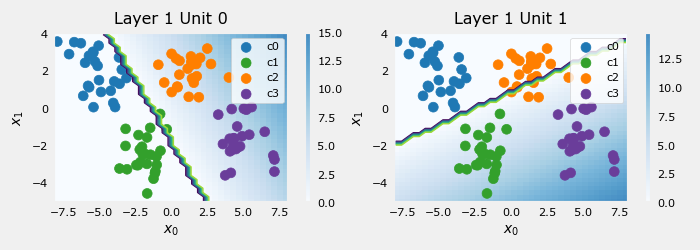

In [9]:
# trazar la función de la primera capa
plt_layer_relu(X_train, y_train.reshape(-1,), W1, b1, classes)

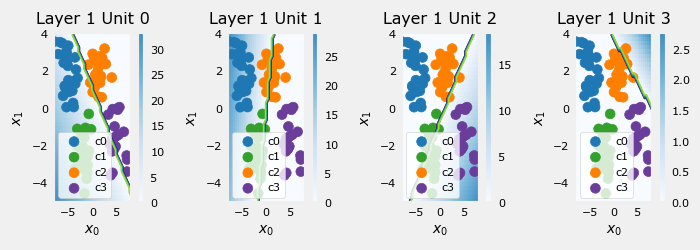

In [11]:
l2 = model.get_layer("L2")
W2,b2 = l2.get_weights()
plt_layer_relu(X_train, y_train.reshape(-1,), W2, b2, classes)

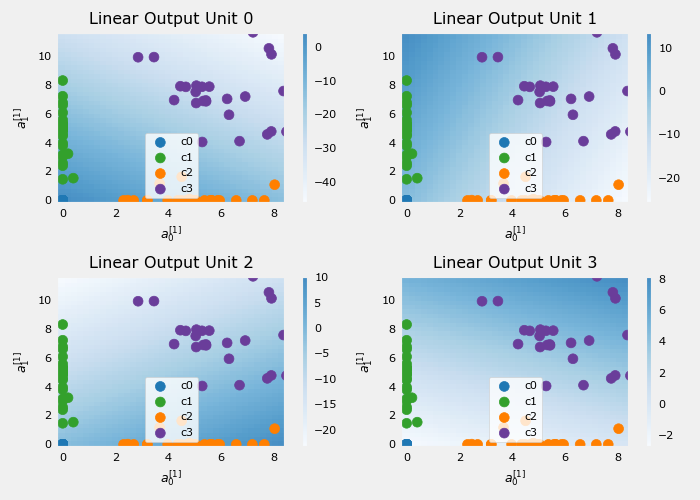

In [12]:
# recoger los parámetros entrenados de la capa de salida
l2 = model.get_layer("L2")
W2, b2 = l2.get_weights()
# crear las "nuevas características", los ejemplos de entrenamiento después de la transformación L1
Xl2 = np.maximum(0, np.dot(X_train,W1) + b1)

plt_output_layer_linear(Xl2, y_train.reshape(-1,), W2, b2, classes,
                        x0_rng = (-0.25,np.amax(Xl2[:,0])), x1_rng = (-0.25,np.amax(Xl2[:,1])))

## Explanation
#### Layer 1 <img align="Right" src="./images/C2_W2_mclass_layer1.png"  style=" width:600px; padding: 10px 20px ; ">
Estos gráficos muestran la función de las unidades 0 y 1 en la primera capa de la red. Las entradas son ($x_0,x_1$) en el eje. La salida de la unidad está representada por el color del fondo. Esto se indica con la barra de color a la derecha de cada gráfico. Obsérvese que como estas unidades están utilizando un ReLu, las salidas no caen necesariamente entre 0 y 1 y en este caso son mayores de 20 en sus picos. 
Las líneas de contorno en este gráfico muestran el punto de transición entre la salida, $a^{[1]}_j$ siendo cero y no cero. Recordemos el gráfico para un ReLu :<img align="right" src="./images/C2_W2_mclass_relu.png"  style=" width:200px; padding: 10px 20px ; "> La línea de contorno en el gráfico es el punto de inflexión en el ReLu.

La unidad 0 ha separado las clases 0 y 1 de las clases 2 y 3. Los puntos a la izquierda de la línea (clases 0 y 1) tendrán un valor cero, mientras que los puntos a la derecha tendrán un valor mayor que cero.  
La unidad 1 ha separado las clases 0 y 2 de las clases 1 y 3. Los puntos situados por encima de la línea (clases 0 y 2 ) darán como resultado un cero, mientras que los puntos situados por debajo darán como resultado un valor mayor que cero. Veamos cómo funciona esto en la siguiente capa.

#### Layer 2, the output layer  <img align="Right" src="./images/C2_W2_mclass_layer2.png"  style=" width:600px; padding: 10px 20px ; ">

Los puntos en estos gráficos son los ejemplos de entrenamiento traducidos por la primera capa. Una manera de pensar en esto es que la primera capa ha creado un nuevo conjunto de características para la evaluación por la segunda capa. Los ejes en estos gráficos son las salidas de la capa anterior $a^{[1]}_0$ y $a^{[1]}_1$. Como se predijo anteriormente, las clases 0 y 1 (azul y verde) tienen $a^{[1]}_0 = 0$ mientras que las clases 0 y 2 (azul y naranja) tienen $a^{[1]}_1 = 0$.  
Una vez más, la intensidad del color de fondo indica los valores más altos.  
La unidad 0 producirá su valor máximo para los valores cercanos a (0,0), donde se ha mapeado la clase 0 (azul).    
La unidad 1 produce sus valores más altos en la esquina superior izquierda seleccionando la clase 1 (verde).  
La unidad 2 se dirige a la esquina inferior derecha, donde reside la clase 2 (naranja).  
La unidad 3 produce sus valores más altos en la parte superior derecha seleccionando nuestra clase final (púrpura).  

Otro aspecto que no resulta evidente en los gráficos es que los valores se han coordinado entre las unidades. No basta con que una unidad produzca un valor máximo para la clase que está seleccionando, sino que también debe ser el valor más alto de todas las unidades para los puntos de esa clase. Esto se consigue mediante la función softmax implícita que forma parte de la función de pérdida (`SparseCategoricalCrossEntropy`). A diferencia de otras funciones de activación, la softmax funciona en todas las salidas.

Puede utilizar con éxito las redes neuronales sin conocer los detalles de lo que hace cada unidad. Esperemos que este ejemplo haya proporcionado alguna intuición sobre lo que ocurre bajo el capó.

## Congratulations!
Ha aprendido a construir y manejar una red neuronal para la clasificación multiclase.
